# Input Sequence Analysis & Data Preparation
The input files for this analysis have been generated from an Audio Detection CNN. The detected audio was a 4kHz tone emited by an appliance at the completion of its cycle.

# Data File Setup
Configure the folder settings and helper function for loading data files.

In [73]:
from __future__ import print_function
import os
import sys
import numpy as np
import pandas as pd

from os.path import isfile, join

audio_detect_input_directory = r'/Volumes/ThorsHammer/Data Science/data/audio-recognition/audio-detect-pred/'
audio_detect_subsample_directory = r'/Volumes/ThorsHammer/Data Science/data/audio-recognition/audio-detect-subsampled/'

def list_files(base_dir, ext):
    onlyfiles = [f for f in os.listdir(base_dir) if isfile(join(base_dir, f)) and f.split('.')[-1] == ext]
    return np.sort(onlyfiles)

print('Input Files:')
input_files = list_files(audio_detect_input_directory,'txt')
print(input_files)

Input Files:
['161225-000_16bit-part-0.txt' '161225-000_16bit-part-1.txt'
 '161225-000_16bit-part-2.txt' '161225-000_16bit-part-3.txt'
 '161225-000_16bit-part-4.txt' '161225-000_16bit-part-5.txt'
 '161225-000_16bit-part-6.txt' '161225-001_16bit-part-0.txt'
 '161225-001_16bit-part-1.txt' '161225-001_16bit-part-10.txt'
 '161225-001_16bit-part-2.txt' '161225-001_16bit-part-3.txt'
 '161225-001_16bit-part-4.txt' '161225-001_16bit-part-5.txt'
 '161225-001_16bit-part-6.txt' '161225-001_16bit-part-7.txt'
 '161225-001_16bit-part-8.txt' '161225-001_16bit-part-9.txt'
 '161225-002_16bit-part-0.txt' '161225-003_16bit-part-0.txt'
 '161225-004_16bit-part-0.txt' '161225-005_16bit-part-0.txt'
 '161225-006_16bit-part-0.txt' '161225-006_16bit-part-1.txt'
 '161225-006_16bit-part-2.txt']


# Load Files
Files are loaded into pandas dataframes and stored in a dictionary keyed by file name.

In [2]:
%%time
input_dfs = {}
for item in input_files:
    
    input_file = '{0}/{1}'.format(audio_detect_input_directory,item)
    input_dfs[item]=pd.read_csv(input_file).astype(np.float32)


CPU times: user 37.7 ms, sys: 3.07 ms, total: 40.8 ms
Wall time: 202 ms


# Plot the Data
Each input file is visualised to see which files contain the positive class.

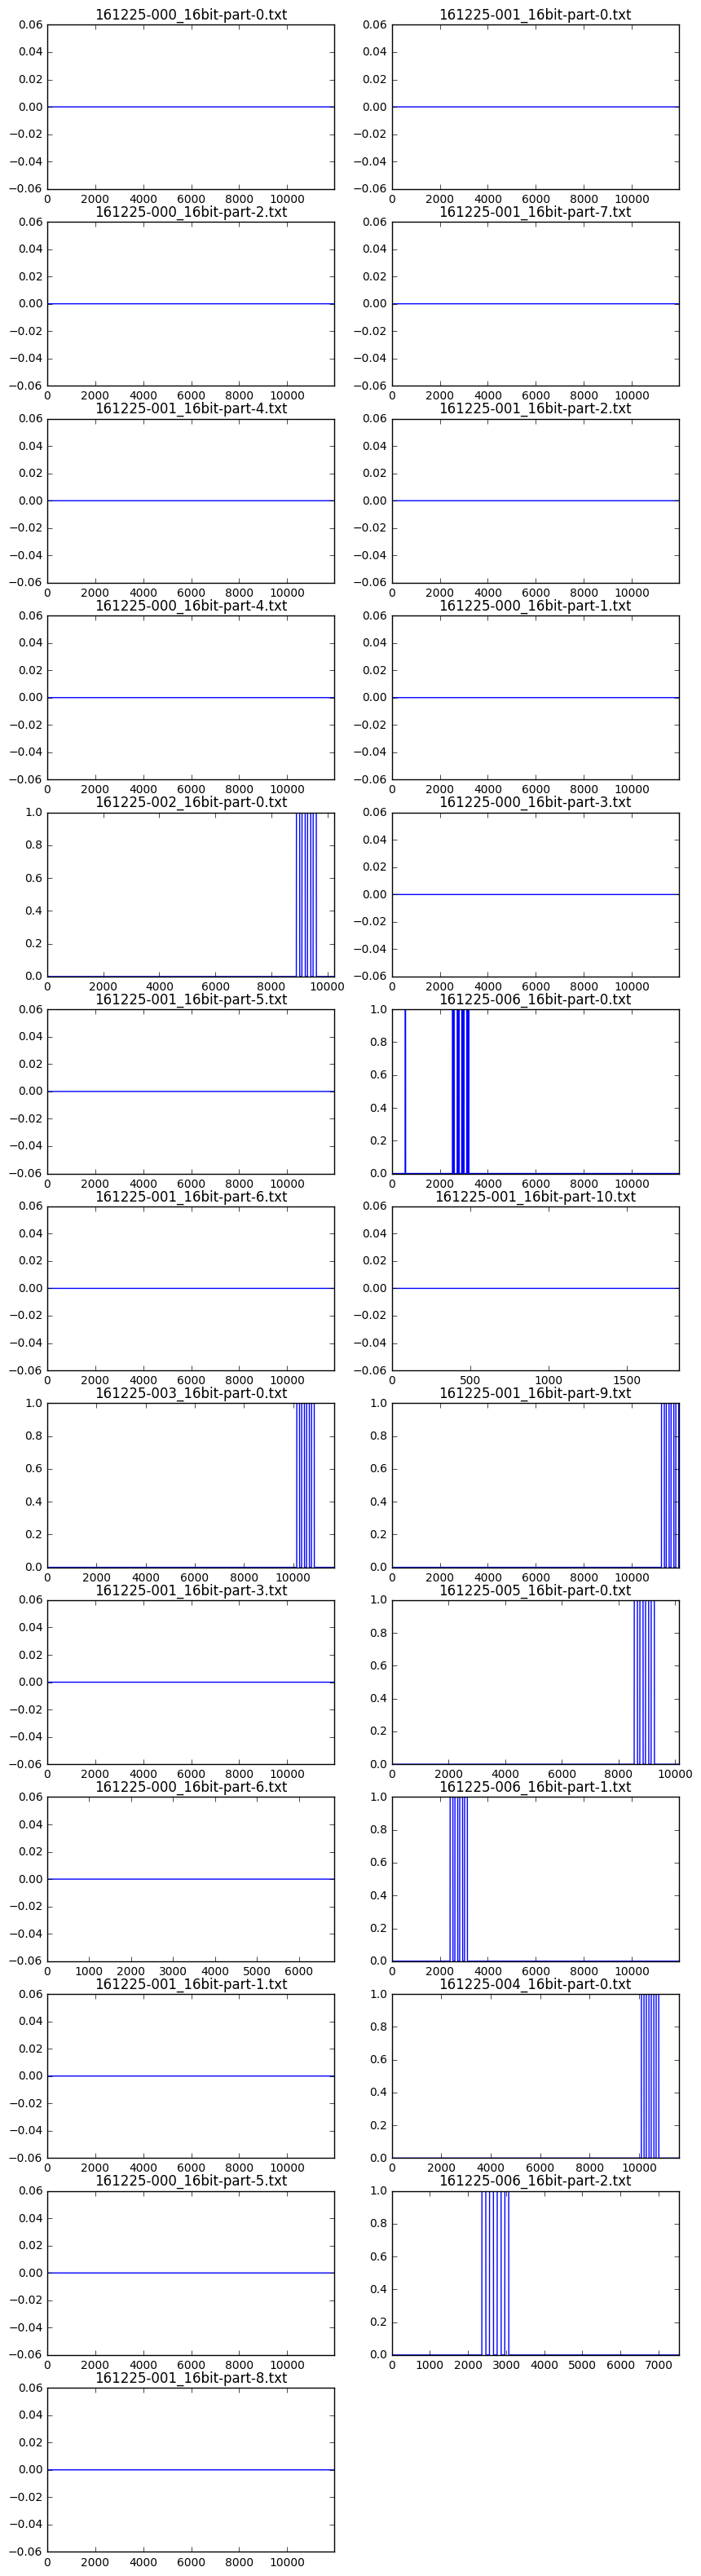

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,40))
count = 1
for key in input_dfs.keys():
    ax = fig.add_subplot(13,2,count)
    count = count + 1
    input_dfs[key].plot(ax=ax, legend=False, title=key)
plt.show()

# Down-Sample the input file

In [69]:
resampled_dfs = {}
for key in input_dfs.keys():
    df = input_dfs[key]
    # Build index to sample every 20th row
    sample_stride = 20
    size = df.shape[0]
    np.arange(0,size)
    base = np.zeros(sample_stride)
    base[0] = 1

    index = np.tile(base,size/sample_stride+1)[0:size]
    sub_sample = df[index==1]
    resampled_dfs[key] = sub_sample

# Verify the Sub-Sampled Data

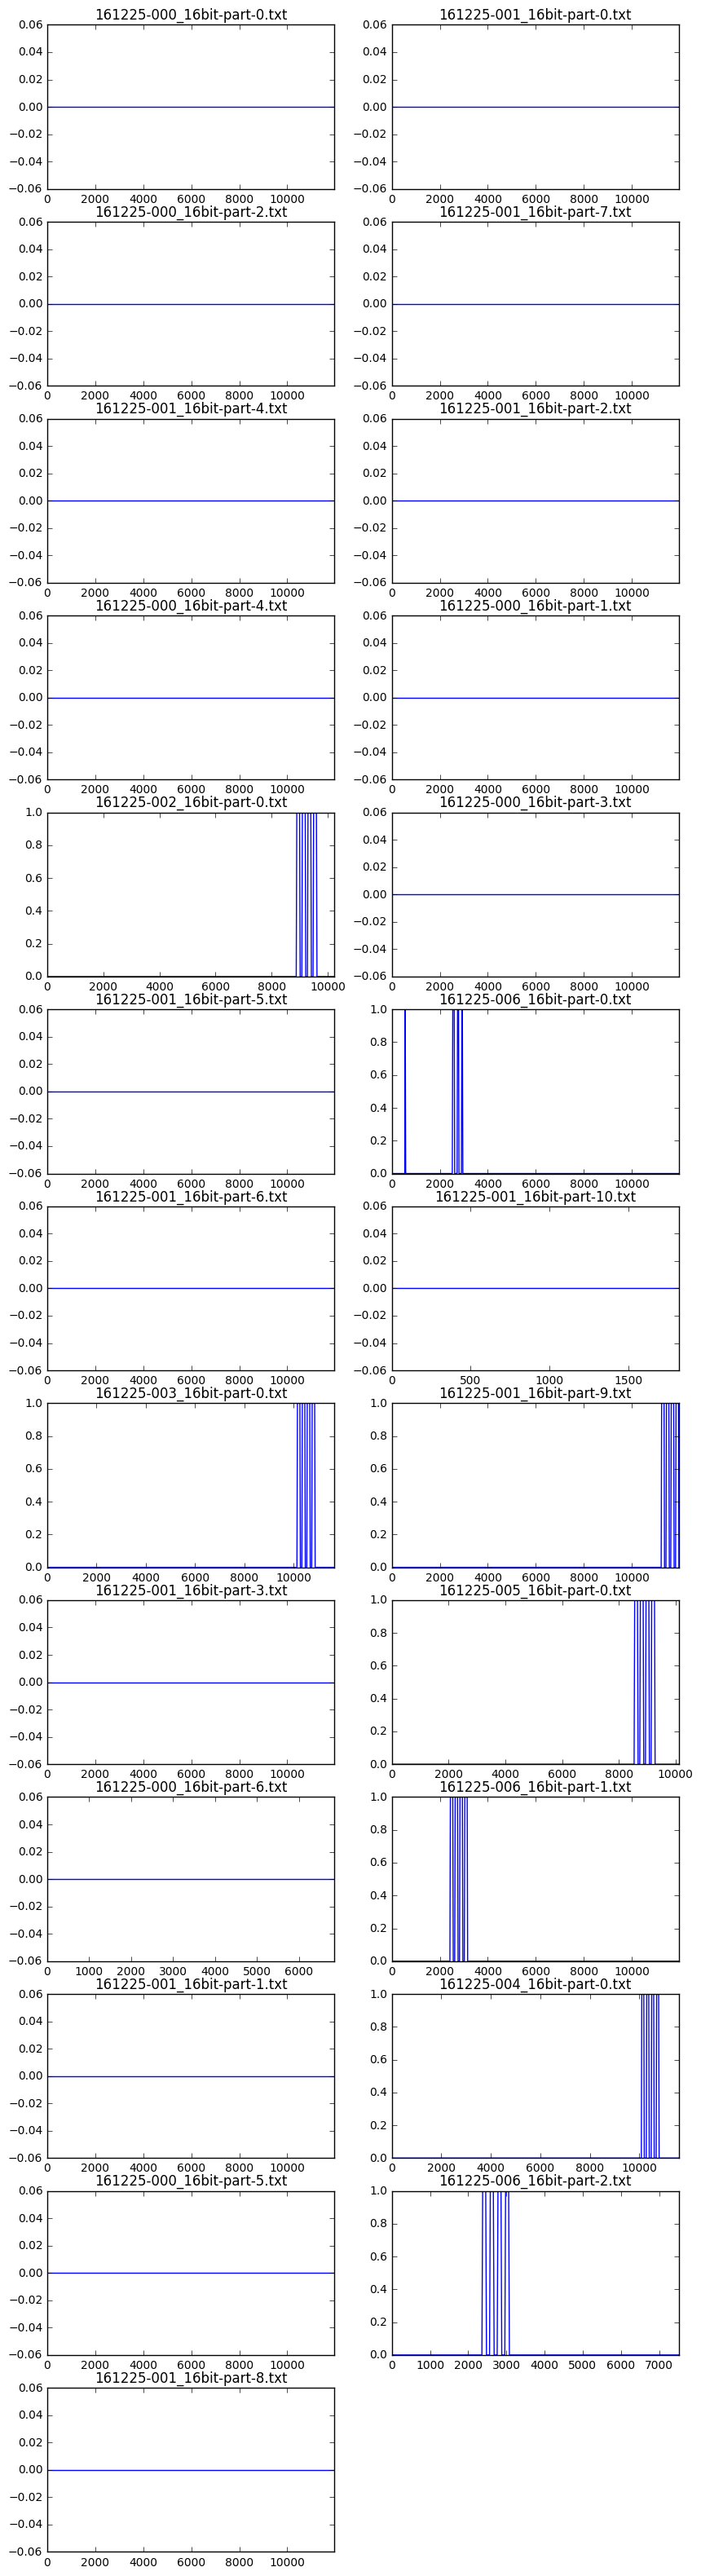

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,40))
count = 1
for key in resampled_dfs.keys():
    ax = fig.add_subplot(13,2,count)
    count = count + 1
    resampled_dfs[key].plot(ax=ax, legend=False, title=key)
plt.show()

# Save Sub-Sampled Data
The reduced data frames are saved for use in an RNN sequence detector.

In [75]:
for key in resampled_dfs.keys():
    response_output_file = '{0}/{1}'.format(audio_detect_subsample_directory,key)
    np.savetxt(response_output_file,resampled_dfs[key],fmt='%u')